# Exploring Weather Trends

Starting with a dataset provided by Udacity, I try here to explore the similarities and differences between the temperature trends between my hometown Bucharest and the rest of the world.

## Extracting the data
1. Identify the cities available in my country.
In the first trials I selected the first lines from the ```city_list``` table to understand how the data actually looks. I've noticed that countries names are in english and the first character is uppercase.
Then I tried to identify all available towns in Romania
```
SELECT * FROM city_list WHERE country = 'Romania'
```
2. Here I identified "Bucharest" in the list and I proceeded selecting Bucharest and world data and exported to csv
```
SELECT * from city_data where city = 'Bucharest' ORDER BY year ASC
SELECT * from global_data ORDER BY year ASC
```

## Exploring the data

I imported the csv files in Google Drive and explored in sheets the data.
I computed the moving average as in the example in the course.

Then I wanted to process better the data and opened a Google Colab Notebook to go further.

In Colab I imported the clibraries I will use

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import gspread
from oauth2client.client import GoogleCredentials
from google.colab import auth

I made a connection to my Google Sheets files

In [ ]:
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

I loaded both files into Colab, abd observed the data infered were all strings

In [ ]:
worksheet = gc.open('world_data').sheet1
world_data = np.array(worksheet.get_all_values())
world_data = pd.DataFrame(world_data[1:], columns=world_data[0], index=world_data[1:, 0])

worksheet = gc.open('bucharest_data').sheet1
city_data = np.array(worksheet.get_all_values())
city_data = pd.DataFrame(city_data[1:], columns=city_data[0], index=city_data[1:, 0])

I cleanedup empty values and replaced them with NaN values, then converted them to float

In [ ]:
city_data.avg_temp = city_data.avg_temp.apply(lambda x: x.strip()).replace('', np.nan).astype(np.float)

In [ ]:
world_data.avg_temp = world_data.avg_temp.apply(lambda x: x.strip()).replace('', np.nan).astype(np.float)

I Computed the rolling window using pandas and tried fiew Options for the window. A window of 10 years seems to be good enough.

In [ ]:
ROLLING_WINDOW = 10

In [ ]:
city_averages = city_data.avg_temp.rolling(window=ROLLING_WINDOW).mean()
world_averages = world_data.avg_temp.rolling(window=ROLLING_WINDOW).mean()

Using the resulted moving averages I plot them in the same figure

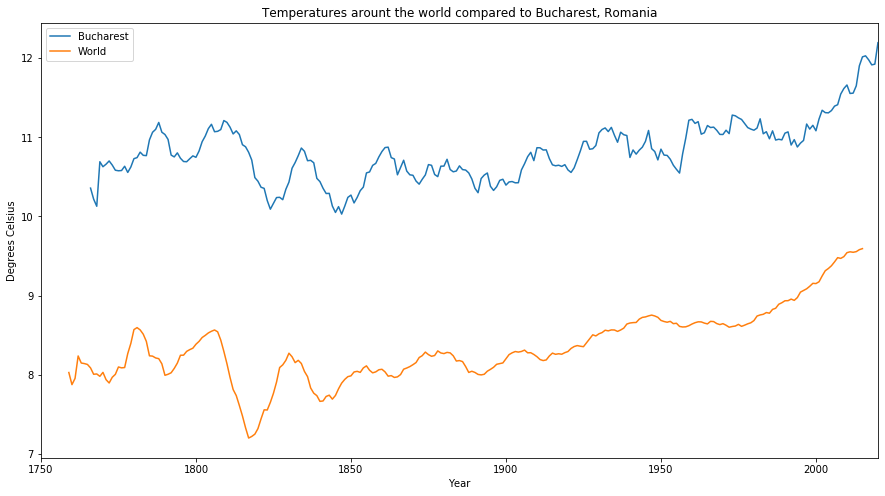

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.set(title='Temperatures arount the world compared to Bucharest, Romania')
ax.set_xlabel('Year')
ax.set_ylabel('Degrees Celsius')
city_averages.plot(ax=ax,label="Bucharest")
world_averages.plot(ax=ax, label="World")
ax.legend()

1. Temperatures in Bucharest are about 2 degrees higher than the world
2. Changes in Bucharest's temperatures are almost the same as in the global ones. The world temperature are a little bit more smooth probably due to the averaging.
3. Overall trend for the World and Bucharest seem to be getting hotter and in the last years the temperatures go up faster
4. Another interesting plot is the difference between Bucharest and the World. The plot tells us the difference is overall decreasing.

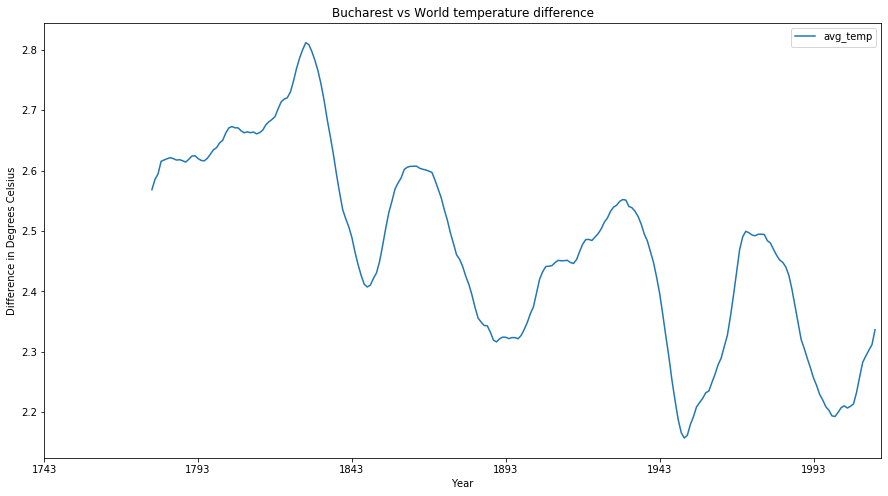

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.set(title="Bucharest vs World temperature difference")
ax.set_xlabel('Year')
ax.set_ylabel('Difference in Degrees Celsius')
city_averages.sub(world_averages).rolling(window=20).mean().plot()
ax.legend()